## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=64, activation="relu")(input_layer)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=16, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/16
50000/50000 [==============================] - 3s 55us/step - loss: 2.0051 - accuracy: 0.2723 - val_loss: 1.8405 - val_accuracy: 0.3334
Epoch 2/16
50000/50000 [==============================] - 3s 53us/step - loss: 1.7988 - accuracy: 0.3554 - val_loss: 1.7662 - val_accuracy: 0.3728
Epoch 3/16
50000/50000 [==============================] - 3s 53us/step - loss: 1.7383 - accuracy: 0.3838 - val_loss: 1.7624 - val_accuracy: 0.3716
Epoch 4/16
50000/50000 [==============================] - 3s 53us/step - loss: 1.7005 - accuracy: 0.3978 - val_loss: 1.6762 - val_accuracy: 0.4112
Epoch 5/16
50000/50000 [==============================] - 3s 53us/step - loss: 1.6691 - accuracy: 0.4110 - val_loss: 1.6492 - val_accuracy: 0.4124
Epoch 6/16
50000/50000 [==============================] - 3s 53us/step - loss: 1.6448 - accuracy: 0.4193 - val_loss: 1.6375 - val_accuracy: 0.4200
Epoch 7/16
50000/50000 [==============================] - 3s 53us/st

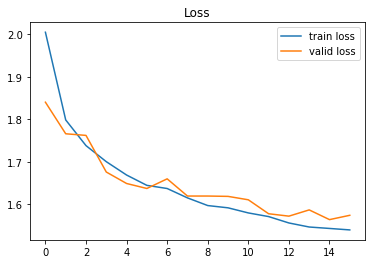

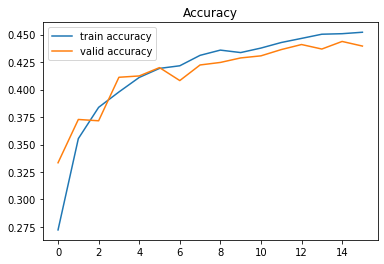

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=16, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/16
50000/50000 [==============================] - 3s 54us/step - loss: 1.5029 - accuracy: 0.4688 - val_loss: 1.5409 - val_accuracy: 0.4499
Epoch 2/16
50000/50000 [==============================] - 3s 52us/step - loss: 1.4970 - accuracy: 0.4709 - val_loss: 1.5393 - val_accuracy: 0.4514
Epoch 3/16
50000/50000 [==============================] - 3s 51us/step - loss: 1.4955 - accuracy: 0.4712 - val_loss: 1.5388 - val_accuracy: 0.4503
Epoch 4/16
50000/50000 [==============================] - 3s 52us/step - loss: 1.4948 - accuracy: 0.4717 - val_loss: 1.5390 - val_accuracy: 0.4532
Epoch 5/16
50000/50000 [==============================] - 3s 51us/step - loss: 1.4941 - accuracy: 0.4718 - val_loss: 1.5383 - val_accuracy: 0.4510
Epoch 6/16
50000/50000 [==============================] - 3s 52us/step - loss: 1.4935 - accuracy: 0.4720 - val_loss: 1.5394 - val_accuracy: 0.4531
Epoch 7/16
50000/50000 [==============================] - 3s 51us/st

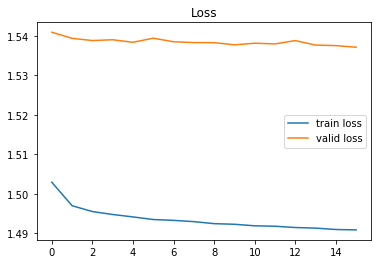

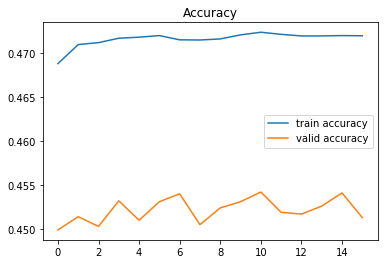

In [10]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()